In [5]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
data_folder = os.path.join('../..', 'data')
file_name = "Data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
leagues = ['E0', 'E1', 'E2', 'E3']
start_year, end_year = 2005, 2025
util.fetch_data_into_file(data_folder=data_folder, file_name=file_name, start_year=start_year, end_year=end_year, leagues=leagues)

Data fetched and saved to ../../data/Data.csv


In [3]:
data = util.load_data(data_folder, file_name)
data = data[data['HomeTeam'].isna() == False]
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HY,AY,HR,AR,PSH,PSD,PSA,Season
0,E0,2020-09-12,Fulham,Arsenal,0,3,A,0,1,A,...,2,3,2,2,0,0,6.16,4.51,1.56,2021
1,E0,2020-09-12,Crystal Palace,Southampton,1,0,H,1,0,H,...,7,3,2,1,0,0,3.32,3.29,2.40,2021
2,E0,2020-09-12,Liverpool,Leeds,4,3,H,3,2,H,...,9,0,1,0,0,0,1.31,6.25,9.92,2021
3,E0,2020-09-12,West Ham,Newcastle,0,2,A,0,0,D,...,8,7,2,2,0,0,2.18,3.61,3.50,2021
4,E0,2020-09-13,West Brom,Leicester,0,3,A,0,0,D,...,2,5,1,1,0,0,4.00,3.59,2.00,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,E0,2024-10-26,Everton,Fulham,1,1,D,0,0,D,...,4,2,1,0,0,0,2.80,3.38,2.63,2425
1606,E0,2024-10-27,Chelsea,Newcastle,2,1,H,1,1,D,...,7,4,6,3,0,0,1.75,4.35,4.28,2425
1607,E0,2024-10-27,Crystal Palace,Tottenham,1,0,H,1,0,H,...,8,8,4,4,0,0,4.05,3.98,1.86,2425
1608,E0,2024-10-27,West Ham,Man United,2,1,H,0,0,D,...,6,5,5,1,0,0,2.94,3.73,2.35,2425


In [4]:
home_factor, draw_factor, away_factor = data['FTR'].value_counts(normalize=True)['H'], data['FTR'].value_counts(normalize=True)['D'], data['FTR'].value_counts(normalize=True)['A']
home_factor, draw_factor, away_factor

(np.float64(0.43471558501618623),
 np.float64(0.26442628847438465),
 np.float64(0.3008581265094291))

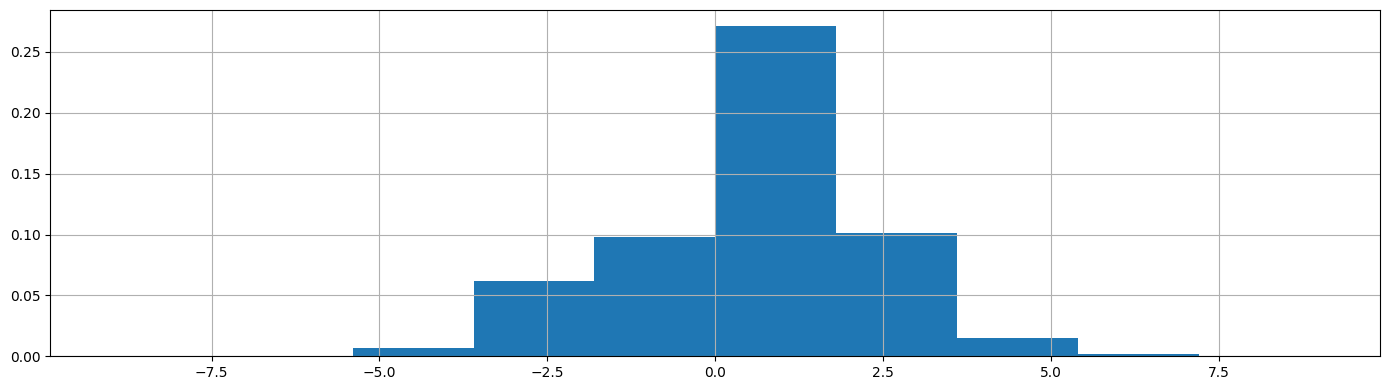

In [5]:
data['Goal difference'] = data['FTHG'] - data['FTAG']
util.plot_histogram(data['Goal difference'], figsize=figsize)

In [6]:
ELO = util.ELO(data, init_rating=1500, draw_factor=draw_factor, k_factor=32, home_advantage=100)
data = ELO.perform_simulations(data)
data = ELO.get_probabilities(data)
data


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,PSH,PSD,PSA,Goal difference,Home ELO,Away ELO,ELO diff,Home_prob_ELO,Draw_prob_ELO,Away_prob_ELO
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,NaN,NaN,NaN,0.0,1500,1500,0,0.367787,0.264426,0.367787
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,NaN,NaN,NaN,-2.0,1500,1500,0,0.367787,0.264426,0.367787
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,0.0,1500,1500,0,0.367787,0.264426,0.367787
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,0.0,1500,1500,0,0.367787,0.264426,0.367787
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,0.0,1500,1500,0,0.367787,0.264426,0.367787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38924,E3,2024-10-22,Harrogate,Port Vale,0.0,1.0,A,0.0,0.0,D,...,4.16,3.72,1.85,-1.0,884.164686,979.522901,-95.358214,0.269304,0.19362,0.537076
38925,E3,2024-10-22,Milton Keynes Dons,Accrington,2.0,1.0,H,1.0,0.0,H,...,1.62,4.25,5.02,1.0,943.35281,845.248347,98.104463,0.541705,0.191684,0.266611
38926,E3,2024-10-22,Salford,Swindon,2.0,1.0,H,1.0,0.0,H,...,2.36,3.37,3.06,1.0,851.579011,811.292143,40.286868,0.440768,0.233901,0.32533
38927,E3,2024-10-22,Tranmere,Grimsby,0.0,1.0,A,0.0,0.0,D,...,2.08,3.21,3.88,-1.0,877.486263,876.206332,1.279931,0.370116,0.263452,0.366432


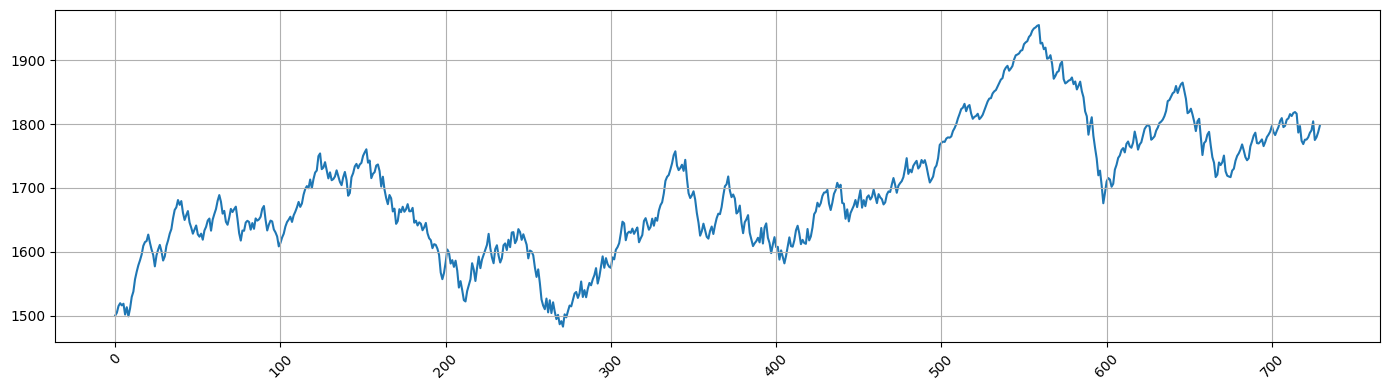

In [7]:
ELO_Liverpool = util.extract_elo_history(data, 'Liverpool')
#ELO_Liverpool.set_index('Date', inplace=True)
util.plot_series(ELO_Liverpool['ELO'], figsize=figsize)

In [8]:
data = util.add_discrete_league_columns(data)
data = util.add_discrete_result_columns(data)
data = util.add_discrete_season_columns(data)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,1516,1617,1718,1819,1920,2021,2122,2223,2324,2425
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,False,False,False,False,False,False,False,False,False,False
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,False,False,False,False,False,False,False,False,False,False
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,False,False,False,False,False,False,False,False,False,False
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,False,False,False,False,False,False,False,False,False,False
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38924,E3,2024-10-22,Harrogate,Port Vale,0.0,1.0,A,0.0,0.0,D,...,False,False,False,False,False,False,False,False,False,True
38925,E3,2024-10-22,Milton Keynes Dons,Accrington,2.0,1.0,H,1.0,0.0,H,...,False,False,False,False,False,False,False,False,False,True
38926,E3,2024-10-22,Salford,Swindon,2.0,1.0,H,1.0,0.0,H,...,False,False,False,False,False,False,False,False,False,True
38927,E3,2024-10-22,Tranmere,Grimsby,0.0,1.0,A,0.0,0.0,D,...,False,False,False,False,False,False,False,False,False,True


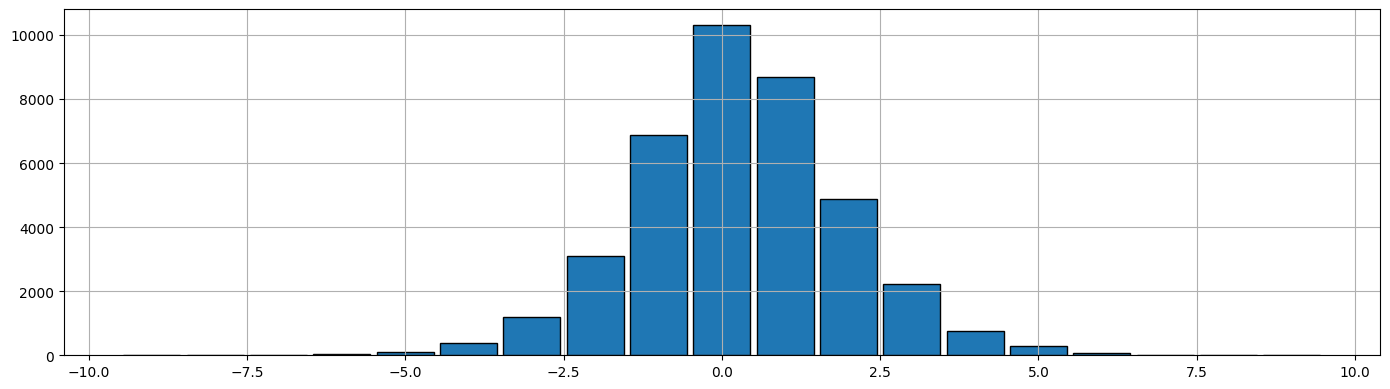

In [9]:
util.plot_discrete_histogram(data['FTHG']-data['FTAG'], figsize=figsize)

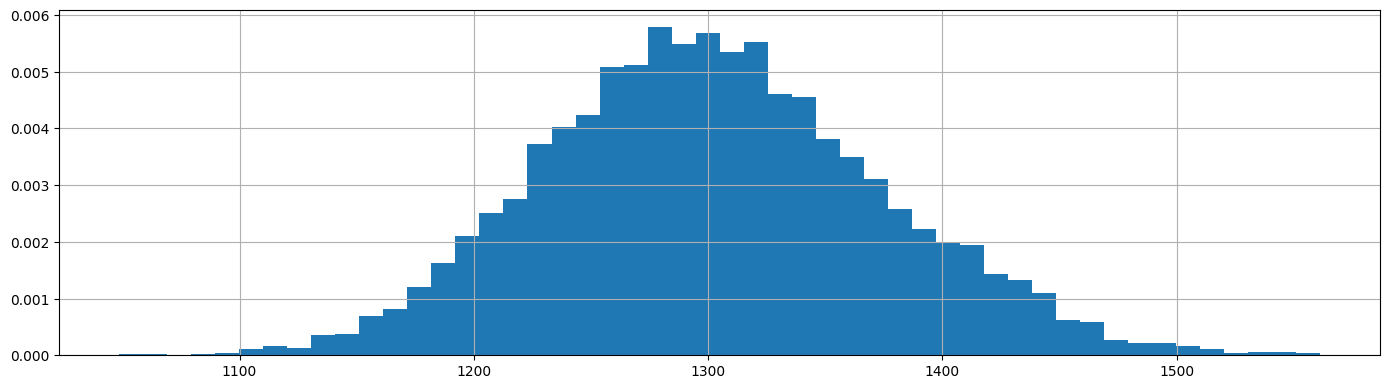

In [10]:
util.plot_histogram(data.loc[data['Div'] == 'E1', 'Home ELO'], figsize=figsize, bins=50)

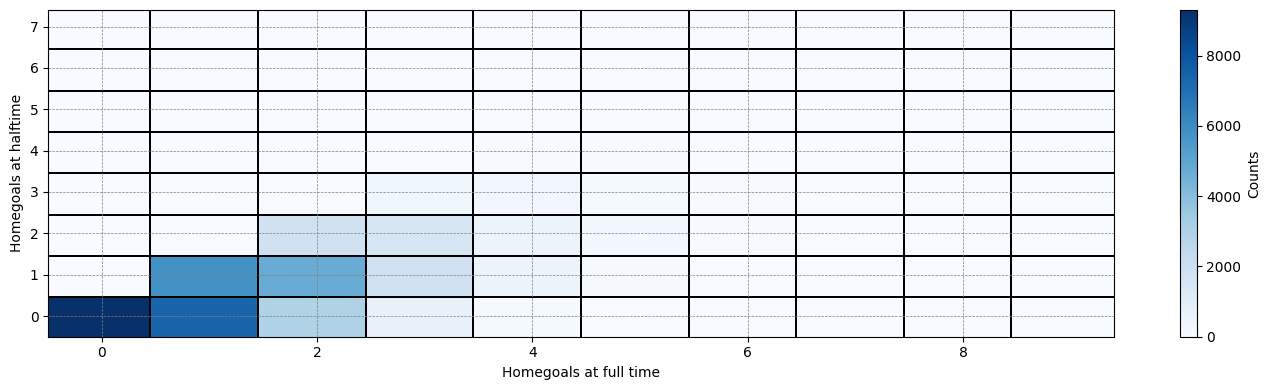

In [11]:
util.plot_discrete_histogram2d(x_data=data['FTHG'], y_data=data['HTHG'], x_label='Homegoals at full time', y_label='Homegoals at halftime', figsize=figsize)

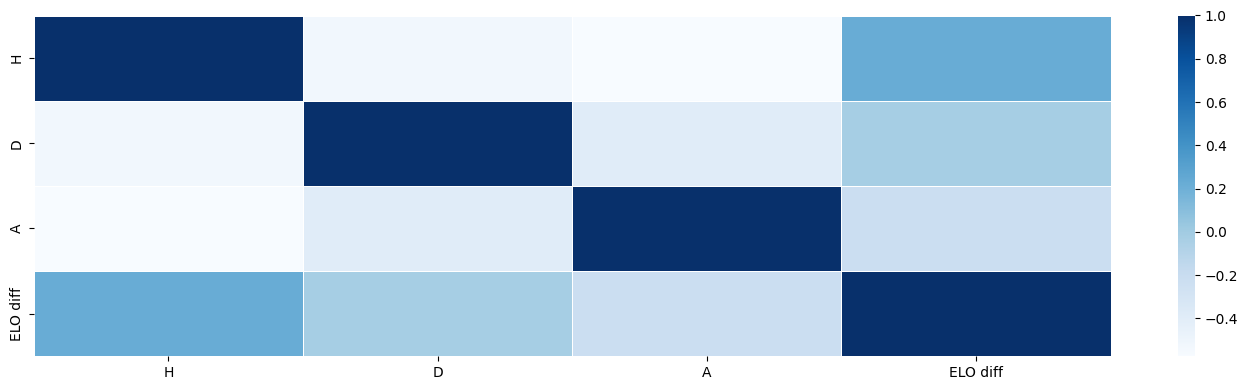

In [27]:
util.plot_correlation_matrix(data[['H', 'D', 'A', 'ELO diff']], figsize=figsize)

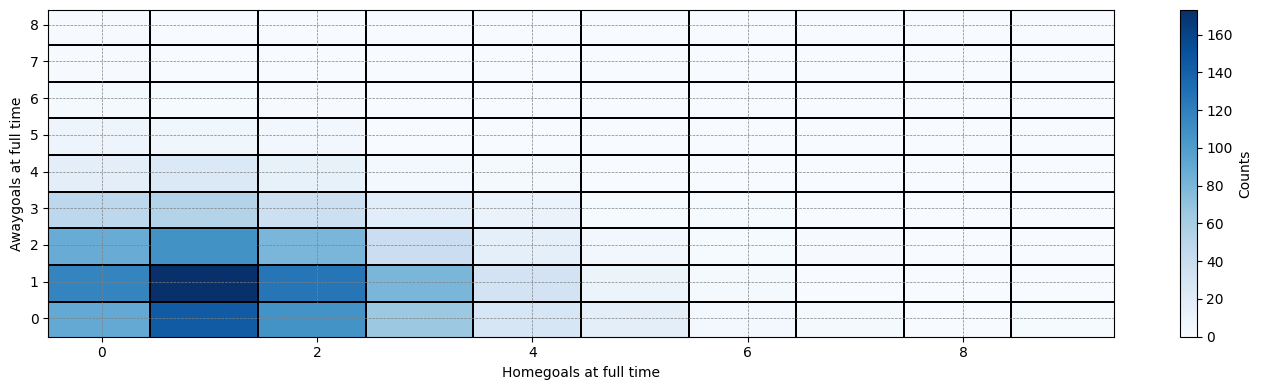

In [4]:
util.plot_discrete_histogram2d(x_data=data['FTHG'], y_data=data['FTAG'], x_label='Homegoals at full time', y_label='Awaygoals at full time', figsize=figsize)